<h1> K Nearest Neighbors (K-NN) </h1>

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
#import knn model
from sklearn.neighbors import KNeighborsClassifier
#arguments of how many clusters or n_neighbors, metric of distance(minkowski), 
#and power paramter for minkowski distance (p=2 for eucladian)
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)

In [10]:
#fit our knn classifier to our training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
#First, get our y predictions
y_pred = classifier.predict(X_test)

#Make our confusion matrix to see how our knn model's predictions fare
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
cm.head()

,0,1
0,64,4
1,3,29


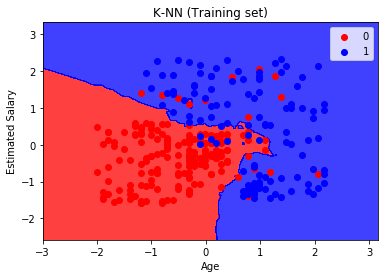

In [21]:
#Visualizing our KNN model's training results
from matplotlib.colors import ListedColormap
#make shortcuts tour features and target variables for easy copy/paste
X_set, y_set = X_train, y_train
#prepare the grid with all the pixel points of the graph, from the min-max range
#take a small step size ~.01, so our colorization looks like shade
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#where the color magic happens, where we apply our color mapping to all the pixels on our graph
#based on our classifier different regions
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
#set the axis limits for our graph
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#plot our data points in color based off their classification
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

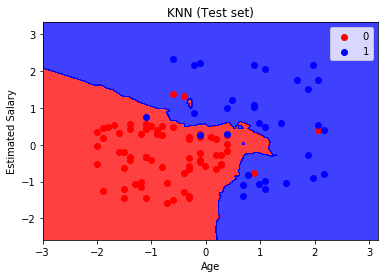

In [22]:
##Visualizing our KNN model's testing results
from matplotlib.colors import ListedColormap
#make shortcuts tour features and target variables for easy copy/paste
X_set, y_set = X_test, y_test
#prepare the grid with all the pixel points of the graph, from the min-max range
#take a small step size ~.01, so our colorization looks like shade
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#where the color magic happens, where we apply our color mapping to all the pixels on our graph
#based on our classifier different regions
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
#set the axis limits for our graph
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#plot our data points in color based off their classification
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#much better fit than our logistic regression